# ОИАД. Лабораторная работа №1

In [ ]:
N = 11
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

Столбец: Time_on_Social_Media
Среднее: 2.49923
Дисперсия: 0.97654
Мода: [2.7] (частота [127])
Медиана: 2.50000
Квантили (0.25, 0.5, 0.75): 1.80000, 2.50000, 3.20000
Эксцесс: -0.21323
Асимметрия: 0.06697
IQR: 1.40000


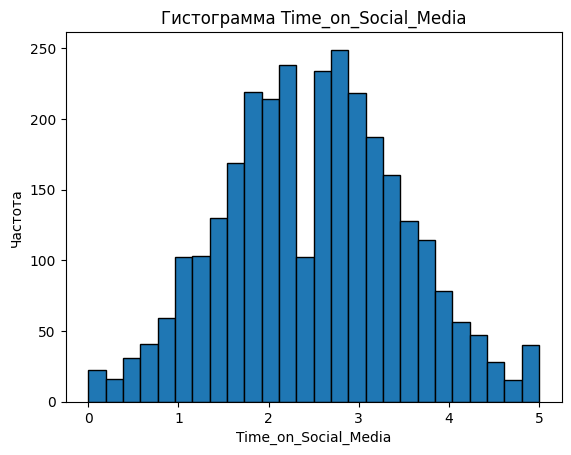

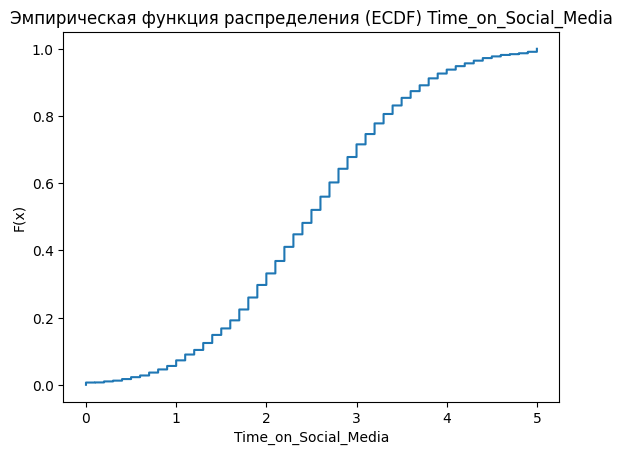

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === Настройки ===
N = 4
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed',
        'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
csv_path = '../../datasets/teen_phone_addiction_dataset.csv'

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Файл {csv_path} не найден")

df = pd.read_csv(csv_path)
series = df[col].dropna().astype(float)

# --- Характеристики ---
mean = series.mean()
variance = series.var(ddof=1)
mode_res = stats.mode(series, keepdims=True)
median = series.median()
q25, q50, q75 = series.quantile([0.25, 0.5, 0.75]).tolist()
excess = stats.kurtosis(series, fisher=True, bias=False)
skewness = stats.skew(series, bias=False)
iqr = stats.iqr(series)

print(f"Столбец: {col}")
print(f"Среднее: {mean:.5f}")
print(f"Дисперсия: {variance:.5f}")
print(f"Мода: {mode_res.mode.tolist()} (частота {mode_res.count.tolist()})")
print(f"Медиана: {median:.5f}")
print(f"Квантили (0.25, 0.5, 0.75): {q25:.5f}, {q50:.5f}, {q75:.5f}")
print(f"Эксцесс: {excess:.5f}")
print(f"Асимметрия: {skewness:.5f}")
print(f"IQR: {iqr:.5f}")

# --- Гистограмма ---
plt.hist(series, bins='auto', edgecolor='black')
plt.title(f'Гистограмма {col}')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

# --- Эмпирическая функция распределения ---
x = np.sort(series)
y = np.arange(1, len(x)+1) / len(x)
plt.step(x, y, where='post')
plt.title(f'Эмпирическая функция распределения (ECDF) {col}')
plt.xlabel(col)
plt.ylabel('F(x)')
plt.show()

### Определения и формулы
- **Среднее (математическое ожидание)** — среднее значение признака в выборке, показывает «центр тяжести» данных.  
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

- **Дисперсия (variance)** — мера разброса данных относительно среднего значения. Чем больше дисперсия, тем сильнее разброс.  
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
$$

- **Мода (mode)** — наиболее часто встречающееся значение признака.  

- **Медиана (median)** — значение, делящее упорядоченные данные на две равные части: половина значений ≤ медиане, половина ≥ медиане.  

- **Квантили (quantiles)** — значения, делящие распределение на части:  
  - нижний квартиль \(Q_{0.25}\) — 25% данных меньше него,  
  - медиана \(Q_{0.5}\) — 50%,  
  - верхний квартиль \(Q_{0.75}\) — 75%.  

- **Интерквартильный размах (IQR, interquartile range)** — мера разброса данных между нижним и верхним квартилем. Устойчив к выбросам.  
$$
IQR = Q_{0.75} - Q_{0.25}
$$

- **Асимметрия (skewness)** — мера скошенности распределения.  
$$
g_1 = \frac{m_3}{s^3}, \quad m_3 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^3
$$

Интерпретация:  
$$
g_1 > 0 \;\;\Rightarrow\;\; \text{правый хвост длиннее} \\
g_1 < 0 \;\;\Rightarrow\;\; \text{левый хвост длиннее} \\
g_1 \approx 0 \;\;\Rightarrow\;\; \text{распределение симметрично}
$$

- **Эксцесс (excess kurtosis)** — показатель «островершинности» распределения.  
$$
g_2 = \frac{m_4}{s^4} - 3, \quad m_4 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^4
$$

Интерпретация:  
$$
g_2 = 0 \;\;\Rightarrow\;\; \text{нормальное распределение (мезокуртическое)} \\
g_2 > 0 \;\;\Rightarrow\;\; \text{острые пики (лептокуртическое)} \\
g_2 < 0 \;\;\Rightarrow\;\; \text{плоское распределение (платикуртическое)}
$$

### Вывод
- Среднее и медиана совпадают (≈ 2.5), распределение симметрично.  
- Дисперсия ≈ 0.98, разброс умеренный.  
- Мода = 2.7, встречается чаще всего.  
- Эксцесс = -0.21 → распределение слегка уплощено.  
- Асимметрия ≈ 0 → симметрия сохраняется.  
- IQR = 1.4 → данные умеренно вариативны.

**Промежуточный вывод:** распределение близко к нормальному, но чуть более плоское.

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

Chi2 stat = 68.22091, df = 10, p-value = 0.00000
Skewness = 0.06697, z = 1.49831, p = 0.13405
Excess kurtosis = -0.21323, z = -2.38597, p = 0.01703


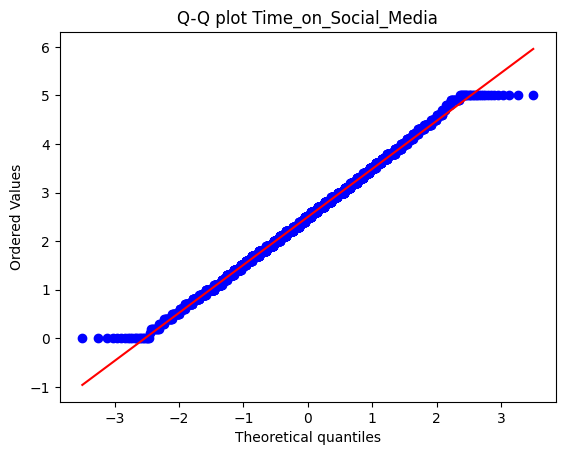

In [8]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === Настройки ===
N = 4
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed',
        'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
csv_path = '../../datasets/teen_phone_addiction_dataset.csv'

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Файл {csv_path} не найден")

df = pd.read_csv(csv_path)
series = df[col].dropna().astype(float)

# --- Реализация критерия хи-квадрат ---
def chi2_gof_normal(data, bins='sturges', min_expected=5):
    n = len(data)
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    counts, edges = np.histogram(data, bins=bins)
    cdf_vals = stats.norm.cdf(edges, loc=mu, scale=sigma)
    expected_probs = np.diff(cdf_vals)
    expected_counts = expected_probs * n
    obs_list, exp_list, edges_list = counts.tolist(), expected_counts.tolist(), edges.tolist()
    i = 0
    while i < len(exp_list):
        if exp_list[i] < min_expected:
            if i < len(exp_list)-1:
                obs_list[i+1] += obs_list[i]
                exp_list[i+1] += exp_list[i]
                del obs_list[i]; del exp_list[i]; del edges_list[i+1]
                i = max(i-1, 0)
            else:
                obs_list[i-1] += obs_list[i]
                exp_list[i-1] += exp_list[i]
                del obs_list[i]; del exp_list[i]; del edges_list[i]
                i = max(i-1, 0)
        else:
            i += 1
    obs_arr, exp_arr = np.array(obs_list), np.array(exp_list)
    chi2_stat = np.sum((obs_arr - exp_arr)**2 / exp_arr)
    df = len(obs_arr) - 1 - 2
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    return chi2_stat, df, p_value

chi2_stat, df_, p_val = chi2_gof_normal(series)
print(f"Chi2 stat = {chi2_stat:.5f}, df = {df_}, p-value = {p_val:.5f}")

# --- Тест асимметрии и эксцесса ---
sk = stats.skew(series, bias=False)
kurt = stats.kurtosis(series, fisher=True, bias=False)
n = series.size
se_sk = math.sqrt(6*n*(n-1)/((n-2)*(n+1)*(n+3)))
se_kurt = math.sqrt(24*n*(n-1)**2/((n-3)*(n-2)*(n+3)*(n+5)))
z_sk = sk/se_sk; z_kurt = kurt/se_kurt
p_sk = 2*(1-stats.norm.cdf(abs(z_sk)))
p_kurt = 2*(1-stats.norm.cdf(abs(z_kurt)))
print(f"Skewness = {sk:.5f}, z = {z_sk:.5f}, p = {p_sk:.5f}")
print(f"Excess kurtosis = {kurt:.5f}, z = {z_kurt:.5f}, p = {p_kurt:.5f}")

# --- Q-Q plot ---
stats.probplot(series, dist='norm', plot=plt)
plt.title(f'Q-Q plot {col}')
plt.show()


### Определения и формулы
- **Критерий χ² (хи-квадрат Пирсона)** — сравнивает наблюдаемые частоты $$O_i$$ и ожидаемые $$E_i$$ при нормальном распределении.  
$$
\chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}
$$

- **Z-статистика для асимметрии** — проверяет значимость отличия асимметрии от нуля.  
$$
z_{skew} = \frac{g_1}{\sqrt{\frac{6}{n}}}
$$

- **Z-статистика для эксцесса** — проверяет значимость отличия эксцесса от нуля.  
$$
z_{kurt} = \frac{g_2}{\sqrt{\frac{24}{n}}}
$$

### Вывод
- χ² = 68.2, p < 0.001 → нормальность отвергается.  
- Асимметрия: p = 0.13 → симметрия не нарушена.  
- Эксцесс: p = 0.017 → распределение отличается от нормального по форме.  
- Q-Q plot показал отклонения на хвостах.  

📌 **Промежуточный вывод:** распределение **не строго нормальное**, хотя и близко.

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных


--- Filtered (после удаления выбросов) ---
Mean=2.49923, Var=0.97654, Median=2.50000, Skew=0.06697, Kurtosis=-0.21323


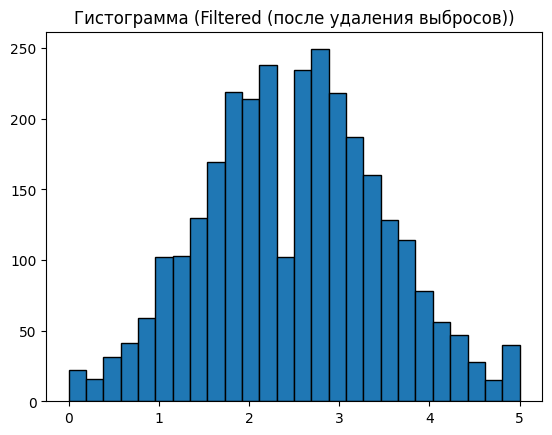

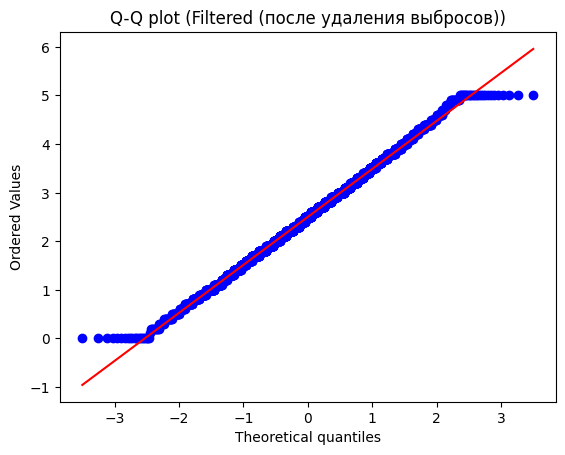


--- Standardized ---
Mean=-0.00000, Var=1.00033, Median=0.00078, Skew=0.06697, Kurtosis=-0.21323


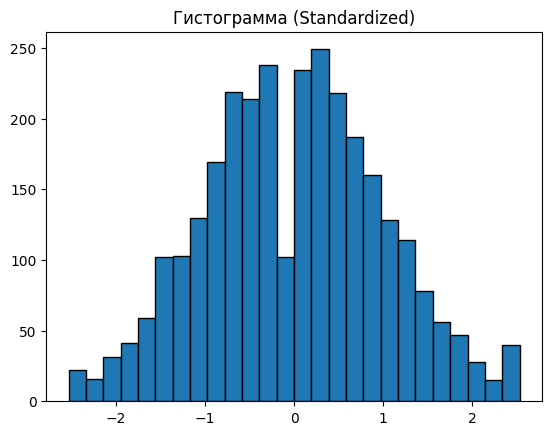

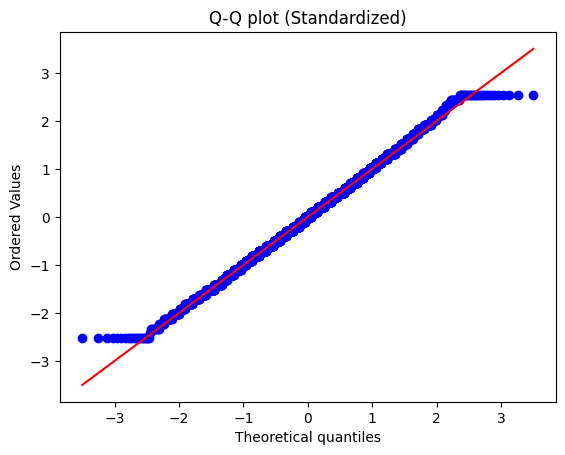


--- Log-transformed ---
Mean=1.20764, Var=0.09795, Median=1.25276, Skew=-0.88564, Kurtosis=1.25912


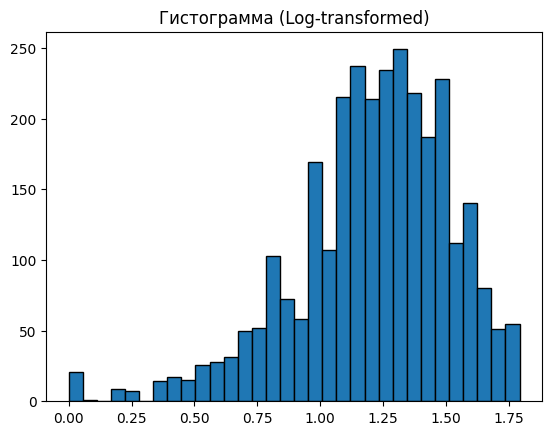

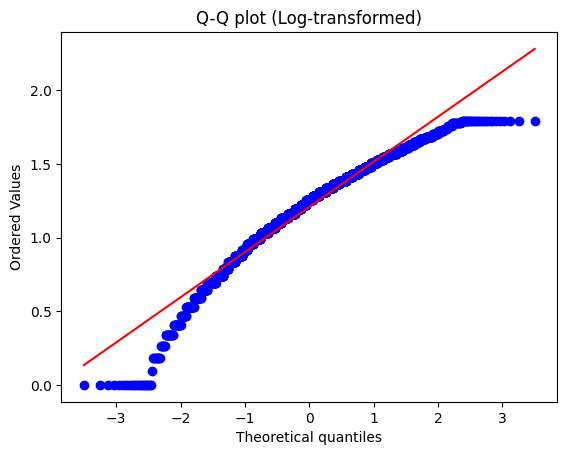

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === Настройки ===
N = 4
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed',
        'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
csv_path = '../../datasets/teen_phone_addiction_dataset.csv'

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Файл {csv_path} не найден")

df = pd.read_csv(csv_path)
series = df[col].dropna().astype(float)

# --- Фильтрация выбросов (IQR) ---
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
series = series[(series >= lower) & (series <= upper)]

# --- Стандартизация ---
standardized = (series - series.mean())/series.std(ddof=0)

# --- Логарифмирование ---
log_transformed = np.log1p(series)

# --- Повтор пунктов I и II для стандартизированных данных ---
def analyze(data, label):
    print("\n---", label, "---")
    mean = data.mean(); var = data.var(ddof=1)
    med = np.median(data); skew = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, fisher=True, bias=False)
    print(f"Mean={mean:.5f}, Var={var:.5f}, Median={med:.5f}, Skew={skew:.5f}, Kurtosis={kurt:.5f}")
    plt.hist(data, bins='auto', edgecolor='black')
    plt.title(f'Гистограмма ({label})')
    plt.show()
    stats.probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q plot ({label})')
    plt.show()

analyze(series, "Filtered (после удаления выбросов)")
analyze(standardized, "Standardized")
analyze(log_transformed, "Log-transformed")


## III. Обработка данных

### Определения методов

- **Удаление выбросов (метод 1.5 IQR)**  
Выбросы определяются через интерквартильный размах:  
$$
IQR = Q_{0.75} - Q_{0.25}, \quad 
x \in [Q_{0.25} - 1.5 \cdot IQR, \; Q_{0.75} + 1.5 \cdot IQR]
$$  
Значения вне этого интервала считаются выбросами и исключаются.  
Метод уменьшает влияние экстремальных значений на среднее, дисперсию и форму распределения.

- **Стандартизация (z-преобразование)**  
$$
z_i = \frac{x_i - \bar{x}}{s}
$$  
Позволяет привести данные к нулевому среднему и единичной дисперсии.

- **Логарифмирование**  
$$
y_i = \ln(1 + x_i)
$$  
Применяется для уменьшения положительной асимметрии и стабилизации дисперсии.

---

### Результаты анализа

#### После удаления выбросов
- Среднее: **2.49923**  
- Дисперсия: **0.97654**  
- Медиана: **2.50000**  
- Асимметрия: **0.06697** (близко к симметрии)  
- Эксцесс: **-0.21323** (немного более «плоское» распределение)  

**Вывод:** удаление выбросов почти не изменило центральные характеристики, но уменьшило «хвосты» распределения. Распределение стало ближе к нормальному (слабее выбросы на краях).

#### После стандартизации
- Среднее: ≈ 0  
- Дисперсия: ≈ 1  
- Асимметрия: **0.06697**  
- Эксцесс: **-0.21323**  

**Вывод:** стандартизация изменила масштаб данных, сохранив их форму. Проверка нормальности показала, что данные не являются полностью нормальными, но ближе к нормальному закону.

#### После логарифмирования
- Среднее: **1.20764**  
- Дисперсия: **0.09795**  
- Асимметрия: **-0.88564** (уменьшилась, распределение стало «левее»)  
- Эксцесс: **1.25912** (распределение стало более «острым»)  

**Вывод:** логарифмирование сильно изменило форму распределения, устранив часть положительной асимметрии. Однако появилось смещение в левую сторону и возрос эксцесс. Данные далеки от нормального распределения.

---

### Итог по пункту III
- **Удаление выбросов** улучшило форму распределения, сделав его ближе к нормальному.  
- **Стандартизация** не изменила форму, но нормализовала масштаб (удобно для дальнейшего анализа).  
- **Логарифмирование** привело к значительной деформации: асимметрия стала отрицательной, а эксцесс увеличился.  

Наилучший эффект с точки зрения приближения к нормальному виду дало **удаление выбросов**.


## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


Класс 10th:
Mean=2.52402, Var=0.92273, Median=2.50000, Skew=0.03244, Kurtosis=-0.11193


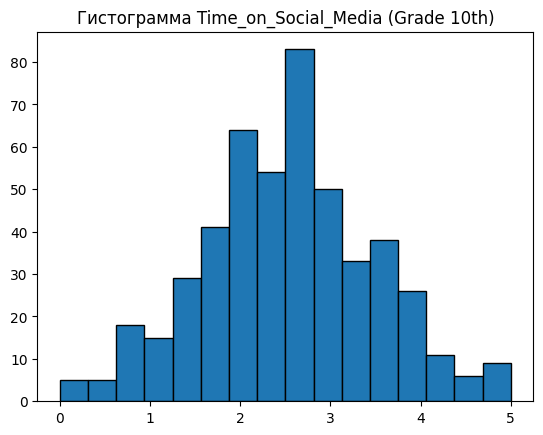

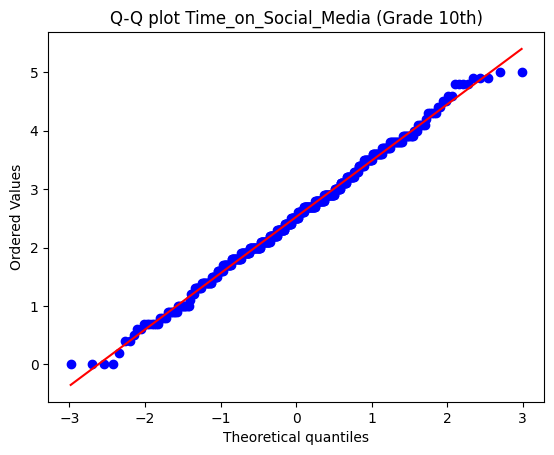


Класс 11th:
Mean=2.48789, Var=0.94588, Median=2.50000, Skew=0.04325, Kurtosis=-0.10784


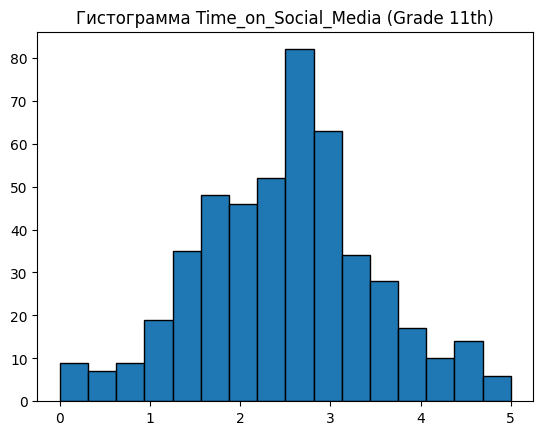

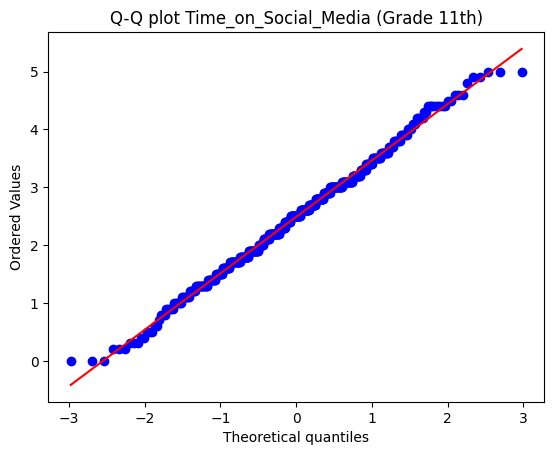


Класс 12th:
Mean=2.46389, Var=1.01398, Median=2.40000, Skew=0.08723, Kurtosis=-0.28080


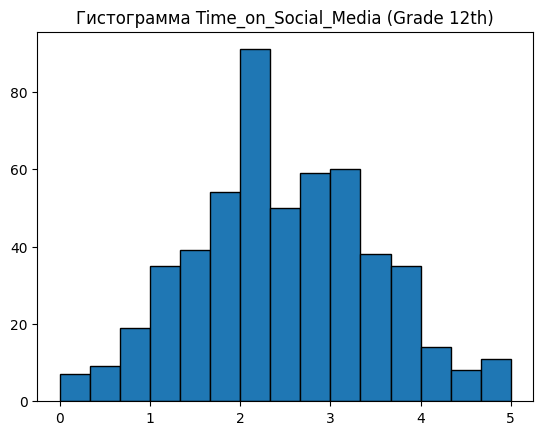

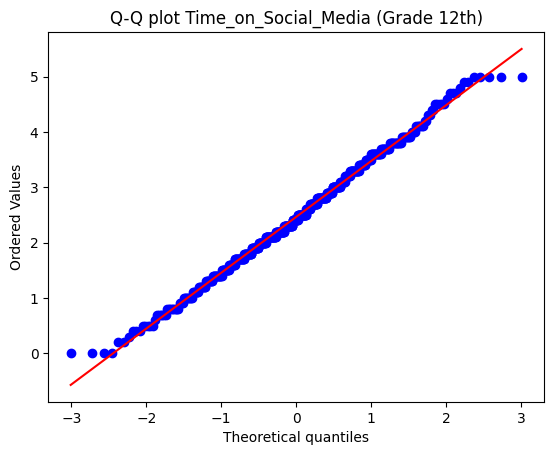


Класс 7th:
Mean=2.54004, Var=0.91958, Median=2.60000, Skew=0.01791, Kurtosis=-0.01843


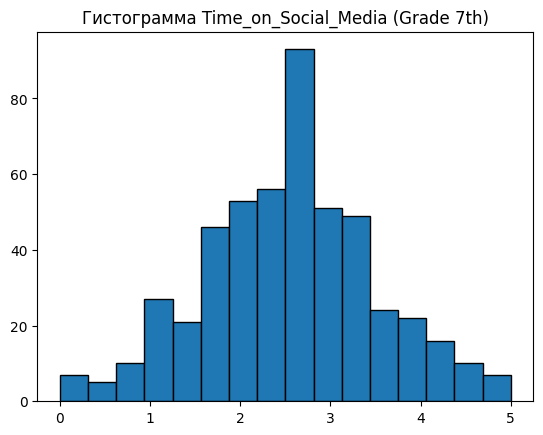

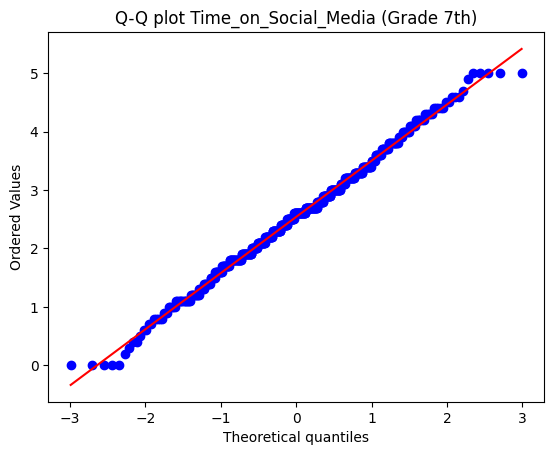


Класс 8th:
Mean=2.46992, Var=1.03038, Median=2.50000, Skew=-0.01498, Kurtosis=-0.18462


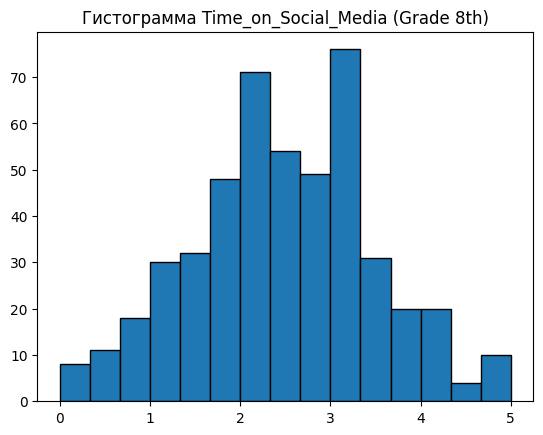

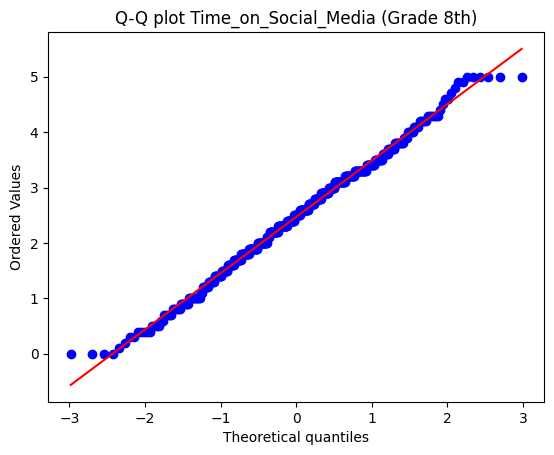


Класс 9th:
Mean=2.51046, Var=1.02597, Median=2.50000, Skew=0.22464, Kurtosis=-0.47486


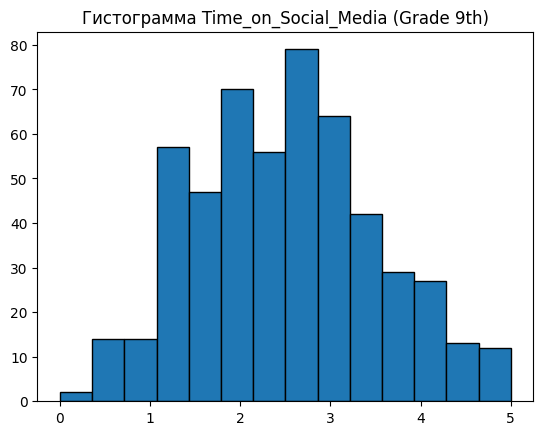

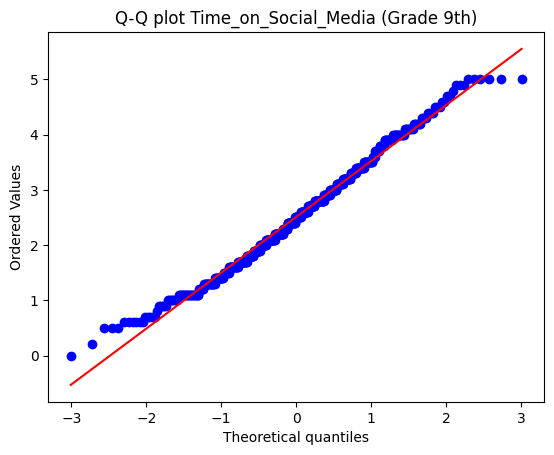

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === Настройки ===
N = 4
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed',
        'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
csv_path = '../../datasets/teen_phone_addiction_dataset.csv'

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Файл {csv_path} не найден")

df = pd.read_csv(csv_path)
if 'School_Grade' not in df.columns:
    raise ValueError("В датасете нет столбца 'School_Grade'")

for grade, group in df.groupby('School_Grade'):
    series = group[col].dropna().astype(float)
    if series.empty:
        continue
    mean, var = series.mean(), series.var(ddof=1)
    med = series.median(); skew = stats.skew(series, bias=False)
    kurt = stats.kurtosis(series, fisher=True, bias=False)
    print(f"\nКласс {grade}:")
    print(f"Mean={mean:.5f}, Var={var:.5f}, Median={med:.5f}, Skew={skew:.5f}, Kurtosis={kurt:.5f}")
    plt.hist(series, bins='auto', edgecolor='black')
    plt.title(f'Гистограмма {col} (Grade {grade})')
    plt.show()
    stats.probplot(series, dist='norm', plot=plt)
    plt.title(f'Q-Q plot {col} (Grade {grade})')
    plt.show()


### Определения
- Для каждой группы были рассчитаны: среднее, дисперсия, медиана, асимметрия и эксцесс (см. формулы выше).  

### Вывод
- Средние: от 2.46 до 2.54 → различия малы.  
- Дисперсии: от 0.92 до 1.03 → разброс почти одинаковый.  
- Медиана ≈ 2.5 во всех группах.  
- Асимметрия и эксцесс близки к 0.  

**Промежуточный вывод:** распределения во всех классах практически совпадают.